# Proyek Analisis Data: Bike Sharing
- **Nama:** Alifia Mustika Sari
- **Email:** alifiamustika02@gmail.com
- **ID Dicoding:** alouvre

## 1. Menentukan Pertanyaan Bisnis (DONE)

Pertama-tama, kita akan mendefinisikan berbagai pertanyaan bisnis yang akan dibutuhkan saat eksplorasi data.
- `Pertanyaan 1:` Bagaimana Tren Jumlah Penggunaan Layanan Bike-Sharing dalam Beberapa Tahun Terakhir? (DONE)
- `Pertanyaan 2:` Apakah Peningkatan Penggunaan Layanan Bike-Sharing Berasal dari Pengguna Registered atau Casual? (DONE)
- `Pertanyaan 3:` Bagaimana Pola Penggunaan Layanan Bike-Sharing Berdasarkan Waktu Dalam Sehari? (DONE)
- `Pertanyaan 4:` Seberapa Berpengaruh Musim Terhadap Peningkatan Jumlah Penggunaan Layanan Bike-Sharing? (DONE)

## 2. Import Semua Packages/Library yang Digunakan

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 3. Data Wrangling

### 3.1. Gathering Data (FIX)

In [390]:
# Memuat data day
df_day = pd.read_csv(r'data\day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [391]:
# Memuat data hour
df_hour = pd.read_csv(r'data\hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data `df_day` lebih cocok untuk menganalisis tren jangka panjang, seperti pola mingguan, bulanan, musiman, atau tahunan, karena data sudah terakumulasi per hari.
- Data `df_hour` lebih sesuai untuk melihat pola penggunaan sepeda pada jam tertentu dalam sehari, memungkinkan analisis terhadap waktu-waktu dengan tingkat penyewaan tertinggi atau terendah.

### 3.2. Assessing Data (FIX)

#### Menilai Data df_day (FIX)

Memeriksa `seluruh parameter termasuk non-numerik` yang terdapat pada table `df_day`.

In [392]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan deskripsi statistik untuk table `df_day` diatas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atribut dari masing-masing data pada table tersebut.

Kemudian `cek seluruh tipe data` dari masing-masing kolom yang terdapat pada table `df_day`.

In [393]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi data pada table `df_day` diatas, dapat dilihat bahwa terdapat sebanyak 16 kolom data, 731 baris data non-null untuk semua kolom data, dengan tipe data `float` sebanyak 4 kolom, `integer` sebanyak 11 kolom, dan `object` sebanyak 1 kolom data.

Setelah dilakukan analisis lebih lanjut, terdapat kesalahan pada 1 tipe data kolom `dteday`, yaitu yang awalnya `object` seharusnya bertipe data `datetime`.

In [394]:
print("Jumlah data df_day yang terdapat missing value:")
df_day.isnull().sum()

Jumlah data df_day yang terdapat missing value:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan missing value atau data yang hilang (NaN) dari table `df_day`, dapat dilihat bahwa tidak terdapat data yang hilang pada table `df_day` sehingga `data tersebut dapat dikatakan aman`.

In [395]:
print("Jumlah Duplikasi pada Data df_day:", df_day.duplicated().sum())

Jumlah Duplikasi pada Data df_day: 0


Berdasarkan hasil pengecekan duplikasi data pada table `df_day`, dapat dilihat bahwa tidak terdapat duplikasi data pada table `df_day` yang berarti `semua data bersifat unik`.

#### Menilai Data df_hour (FIX)

Memeriksa `seluruh parameter termasuk non-numerik` yang terdapat pada table `df_hour`.

In [396]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan deskripsi statistik untuk table `df_hour` diatas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atribut dari masing-masing data pada table tersebut.

Kemudian `cek seluruh tipe data` dari masing-masing kolom yang terdapat pada table `df_hour`.

In [397]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi data pada table `df_hour` diatas, dapat dilihat bahwa terdapat sebanyak 17 kolom data, 17379 baris data non-null untuk semua kolom data, dengan tipe data `float` sebanyak 4 kolom, `integer` sebanyak 12 kolom, dan `object` sebanyak 1 kolom data.

Setelah dilakukan analisis lebih lanjut, terdapat kesalahan pada 1 tipe data kolom `dteday`, yaitu yang awalnya `object` seharusnya bertipe data `datetime`.

In [398]:
print("Jumlah data df_day yang terdapat missing value:")
df_hour.isnull().sum()

Jumlah data df_day yang terdapat missing value:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan missing value atau data yang hilang (NaN) dari table `df_hour`, dapat dilihat bahwa tidak terdapat data yang hilang pada table `df_hour` sehingga `data tersebut dapat dikatakan aman`.

In [399]:
print("Jumlah Duplikasi pada Data df_day:", df_hour.duplicated().sum())

Jumlah Duplikasi pada Data df_day: 0


Berdasarkan hasil pengecekan duplikasi data pada table `df_hour`, dapat dilihat bahwa tidak terdapat duplikasi data pada table `df_hour` yang berarti `semua data bersifat unik`.

**Insight:**
- Terdapat `kesalahan tipe data` kolom `dteday` pada masing-masing table `df_day` dan `df_hour` yang bertipe data `object` disarankan untuk diganti menjadi tipe data `datetime` agar mempermudah dalam analisis berbasis waktu.
- Terdapat `kesalahan tipe data` kolom `season, yr, mnth, holiday, weekday, workingday, weathersit` pada masing-maisng table `df_day` dan `df_hour` yang memiliki tipe data `integer` disarankan untuk diganti menjadi tipe data `category` agar lebih efisien dalam penyimpanan dan analisis.
- Terdapat beberapa kolom yang tidak diperlukan seperti kolom `instant`. Kolom `instant` ini hanya ID urutan baris yang tidak memiliki makna dalam analisis sehingga perlu diabaikan atau dihapus.

### 3.3. Cleaning Data (FIX)

#### 3.3.1. Membersihkan Data df_day

##### Dropping Kolom (FIX)

Menghapus kolom `instant` yang tidak diperlukan dalam analisis.

In [400]:
# df_day.drop(['instant'], axis = 1, inplace= True)

##### Mengganti Tipe Data (FIX)

Memperbaiki tipe data kolom `dteday` pada table `df_day` yang bertipe `object` menjadi `datetime`.

In [401]:
for column in ["dteday"]:
  df_day[column] = pd.to_datetime(df_day[column])

Selain itu, kita perlu memperbaiki tipe data beberapa kolom `('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit')` dari tipe data `integer` menjadi `category`

In [402]:
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
     df_day[column] = df_day[column].astype('category')

Kemudian dapat dilihat dan dilakukan pengecekan ulang informasi pada table `df_day` untuk kolom `dteday` telah berubah menjadi `datetime`. Sedangkan, untuk kolom `'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit` berubah menjadi `category`.

In [403]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

##### Mengganti Nama Kolom (FIX)

Memperbaiki beberapa nama kolom `'dteday','yr','mnth','weekday','weathersit','windspeed','cnt','hum'` pada table `df_day` agar lebih mudah dibaca.

In [404]:
df_day.rename(columns={'dteday':'date','yr':'year','mnth':'month','weekday':'weekday', 
                       'weathersit':'weather_condition', 'windspeed':'wind_speed',
                       'cnt':'count_rent','hum':'humidity'},inplace=True)

In [405]:
print(list(df_day.columns))

['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'count_rent']


##### Label dan Ordinal Encoding (FIX)

Melihat `deskripsi Bike Sharing dataset` yang diberikan oleh pemilik atau author dataset.

In [406]:
f = open('data/Readme.txt', 'r')

print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Berdasarkan karateristik dataset pada Readme.txt, dapat dilihat bahwa beberapa kolom data pada table `df_day` telah melalui tahap label dan encoding. Maka dari itu untuk dapat memproses lebih lanjut, perlu untuk mengembalikan nilai aslinya dengan menggunakan `teknik label dan ordinal decoding`.

In [407]:
df_day['season'] = df_day['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_day['year'] = df_day['year'].map({0: 2011, 1: 2012})
df_day['holiday'] = df_day['holiday'].map({0: 'Not Holiday', 1: 'Holiday'})
df_day['workingday'] = df_day['workingday'].map({0: 'Holiday', 1: 'Working Day'})
df_day['weekday'] = df_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_day['weather_condition'] = df_day['weather_condition'].map({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'})

In [408]:
print("df_day Unique Values")
columns = ['season', 'year', 'holiday', 'workingday', 'weekday', 'weather_condition']

for column in columns:
    print(f"{column:<22}: {df_day[column].unique()}")

df_day Unique Values
season                : ['Springer', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Springer', 'Summer', 'Fall', 'Winter']
year                  : [2011, 2012]
Categories (2, int64): [2011, 2012]
holiday               : ['Not Holiday', 'Holiday']
Categories (2, object): ['Not Holiday', 'Holiday']
workingday            : ['Holiday', 'Working Day']
Categories (2, object): ['Holiday', 'Working Day']
weekday               : ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weather_condition     : ['Misty', 'Clear', 'Light Snow']
Categories (3, object): ['Clear', 'Misty', 'Light Snow']


##### Denormalize Numeric Value (FIX)

Seperti data kategorikal sebelumnya, beberapa kolom data pada table df_day telah melewati proses normalisasi, sehingga kita perlu mengembalikannya ke nilai aslinya dengan `teknik denormalisasi nilai`.

In [409]:
df_day['temp'] = (df_day['temp']) * 41                 # Suhu asli dalam derajat C
df_day['atemp'] = (df_day['atemp']) * 50               # Suhu terasa dalam derajat C
df_day['humidity'] = (df_day['humidity']) * 100        # Kelembaban dalam %
df_day['wind_speed'] = (df_day['wind_speed']) * 67     # Kecepatan angin dalam km/h

#### 3.3.2. Membersihkan Data df_hour

##### Dropping Kolom (FIX)

Menghapus kolom `instant` yang tidak diperlukan dalam analisis.

In [410]:
# df_hour.drop(['instant'], axis = 1, inplace= True)

##### Mengganti Tipe Data (FIX)

Memperbaiki tipe data kolom `dteday` pada table `df_hour` yang bertipe `object` menjadi `datetime`.

In [411]:
for column in ["dteday"]:
  df_hour[column] = pd.to_datetime(df_hour[column])

Selain itu, kita perlu memperbaiki tipe data beberapa kolom `('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit')` dari tipe data `integer` menjadi `category`

In [412]:
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
     df_hour[column] = df_hour[column].astype('category')

Kemudian dapat dilihat dan dilakukan pengecekan ulang informasi pada table `df_hour` untuk kolom `dteday` telah berubah menjadi `datetime`. Sedangkan, untuk kolom `'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit` berubah menjadi `category`.

In [413]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Mengganti Nama Kolom (FIX)

Memperbaiki beberapa nama kolom `'dteday','yr','mnth','weekday','weathersit','windspeed','cnt','hum'` pada table `df_hour` agar lebih mudah dibaca.

In [414]:
df_hour.rename(columns={'dteday':'date','yr':'year','mnth':'month','hr':'hour','weekday':'weekday', 
                       'weathersit':'weather_condition', 'windspeed':'wind_speed',
                       'cnt':'count_rent','hum':'humidity'},inplace=True)

In [415]:
print(list(df_hour.columns))

['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_condition', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'count_rent']


##### Label dan Ordinal Encoding (FIX)

Melihat `deskripsi Bike Sharing dataset` yang diberikan oleh pemilik atau author dataset.

In [416]:
f = open('data/Readme.txt', 'r')

print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Berdasarkan karateristik dataset pada Readme.txt, dapat dilihat bahwa beberapa data kategorikal pada table `df_day` telah melalui tahap label dan encoding. Maka dari itu untuk dapat memproses lebih lanjut, perlu untuk mengembalikan nilai aslinya dengan menggunakan `teknik label dan ordinal decoding`.

In [417]:
df_hour['season'] = df_hour['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['year'] = df_hour['year'].map({0: 2011, 1: 2012})
df_hour['holiday'] = df_hour['holiday'].map({0: 'Not Holiday', 1: 'Holiday'})
df_hour['workingday'] = df_hour['workingday'].map({0: 'Holiday', 1: 'Working Day'})
df_hour['weekday'] = df_hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_hour['weather_condition'] = df_hour['weather_condition'].map({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'})

In [418]:
print("df_day Unique Values")
columns = ['season', 'year', 'holiday', 'workingday', 'weekday', 'weather_condition']

for column in columns:
    print(f"{column:<22}: {df_hour[column].unique()}")

df_day Unique Values
season                : ['Springer', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Springer', 'Summer', 'Fall', 'Winter']
year                  : [2011, 2012]
Categories (2, int64): [2011, 2012]
holiday               : ['Not Holiday', 'Holiday']
Categories (2, object): ['Not Holiday', 'Holiday']
workingday            : ['Holiday', 'Working Day']
Categories (2, object): ['Holiday', 'Working Day']
weekday               : ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weather_condition     : ['Clear', 'Misty', 'Light Snow', 'Heavy Rain']
Categories (4, object): ['Clear', 'Misty', 'Light Snow', 'Heavy Rain']


##### Denormalize Numeric Value (FIX)

Seperti data kategorikal sebelumnya, beberapa data kontinu pada table `df_hour` telah melewati proses normalisasi, sehingga kita perlu mengembalikannya ke nilai aslinya dengan `teknik denormalisasi nilai`.

In [419]:
df_hour['temp'] = (df_hour['temp']) * 41                 # Suhu asli dalam derajat C
df_hour['atemp'] = (df_hour['atemp']) * 50               # Suhu terasa dalam derajat C
df_hour['humidity'] = (df_hour['humidity']) * 100        # Kelembaban dalam %
df_hour['wind_speed'] = (df_hour['wind_speed']) * 67     # Kecepatan angin dalam km/h

**Insight:**
- Kolom yang tidak diperlukan dalam proses analisis seperti kolom `instant` telah dihapus pada masing-masing table `df_day` dan `df_hour`.
- Untuk memudahkan pemahaman analisis lebih lanjut, beberapa nama kolom yang sebelumnya `('dteday','yr','mnth','weekday','weathersit','windspeed','cnt','hum')` diperbaiki menjadi `('date','year','month','weekday','weather_condition','wind_speed','count_rent','humidity')` pada masing-masing table `df_day` dan `df_hour`.
- Kesalahan tipe data pada beberapa kolom antara lain kolom `'date','season', 'year', 'month', 'holiday', 'weekday', 'workingday', dan 'weather_condition'` telah diperbaiki pada masing-masing table `df_day` dan `df_hour`.
- Pengembalian nilai asli telah dilakukan pada beberapa data kategorikal `('season', 'year', 'holiday', 'workingday', 'weekday', 'weather_condition')` yang telah melewati proses nomalisasi pada masing-masing table `df_day` dan `df_hour` dengan menggunakan teknik label dan ordinal encoding.
- Selain data kategorikal, beberapa data kontinu `('temp','atemp','humidity','wind_speed')` juga dilakukan pengembalian nilai asli dengan menggunakan teknik denormalisasi nilai.

#### 3.3.3. Simpan Data df_day dan df_hour

In [420]:
df_day.to_csv(r'dashboard/day_cleaned.csv', index=False)
df_hour.to_csv(r'dashboard/hour_cleaned.csv', index=False)

## 4. Exploratory Data Analysis (EDA)

### 4.1. Eksplorasi Data df_day

#### 4.1.1. Analisis Jumlah Penggunaan Layanan Bike Sharing dalam Tren Tahunan (FIX)

In [421]:
df_day["yearmonth"] = df_day["date"].dt.strftime('%Y-%m')  # Format YYYY-MM
monthly_df = df_day.groupby("yearmonth").agg({
    "casual": "sum",
    "registered": "sum",
    "count_rent": "sum"
}).reset_index()
monthly_df

,yearmonth,casual,registered,count_rent
0,2011-01,3073,35116,38189
1,2011-02,6242,41973,48215
2,2011-03,12826,51219,64045
3,2011-04,22346,72524,94870
4,2011-05,31050,104771,135821
5,2011-06,30612,112900,143512
6,2011-07,36452,104889,141341
7,2011-08,28842,107849,136691
8,2011-09,26545,100873,127418
9,2011-10,25222,98289,123511


#### 4.1.2. Analisis Pengguna Casual & Registered (FIX)

In [422]:
df_yearly_users = df_day.groupby('year', as_index=False)[['casual', 'registered']].sum()
df_yearly_users

C:\Users\User\AppData\Local\Temp\ipykernel_6504\4170587644.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,year,casual,registered
0,2011,247252,995851
1,2012,372765,1676811


In [423]:
df_melted = df_yearly_users.melt(id_vars="year", var_name="user_type", value_name="count")
df_melted

,year,user_type,count
0,2011,casual,247252
1,2012,casual,372765
2,2011,registered,995851
3,2012,registered,1676811


#### 4.1.3. Analisis Musim (FIX)

In [ ]:
# Mengelompokkan dan mengurutkan data berdasarkan jumlah peminjaman
seasonly_users_df_sorted = df_day.groupby("season", as_index=False)["count_rent"].sum()
seasonly_users_df_sorted = seasonly_users_df_sorted.sort_values(by="count_rent", ascending=False)
seasonly_users_df_sorted

C:\Users\User\AppData\Local\Temp\ipykernel_6504\2862880521.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,season,count_rent
2,Fall,1061129
1,Summer,918589
3,Winter,841613
0,Springer,471348


In [446]:
# Menentukan musim dengan jumlah peminjaman tertinggi
max_season = seasonly_users_df_sorted.iloc[0]["season"]
max_season

'Fall'

### 4.2. Eksplorasi Data df_hour

#### (FIX) 4.2.1. Analisis Pola Penggunaan Sepeda Per Jam

In [426]:
# Mengelompokkan jumlah peminjaman per jam
hourly_data = df_hour.groupby("hour")["count_rent"].sum().reset_index()
hourly_data

,hour,count_rent
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [427]:
# Menentukan jam sibuk (morning rush dan evening rush)
rush_hours = [8, 17]  # Pagi jam 08:00 dan sore jam 17:00
rush_data = hourly_data[hourly_data["hour"].isin(rush_hours)]
rush_data

,hour,count_rent
8,8,261001
17,17,336860


**Insight:**
- xxx
- xxx

## 5. Visualization & Explanatory Analysis (DONE)

Pada tahap ini, kita akan menjawab pertanyaan-pertanyaan yang telah ditentukan diatas.

### Pertanyaan 1: Bagaimana Tren Jumlah Penggunaan Layanan Bike-Sharing dalam Beberapa Tahun Terakhir? (DONE)

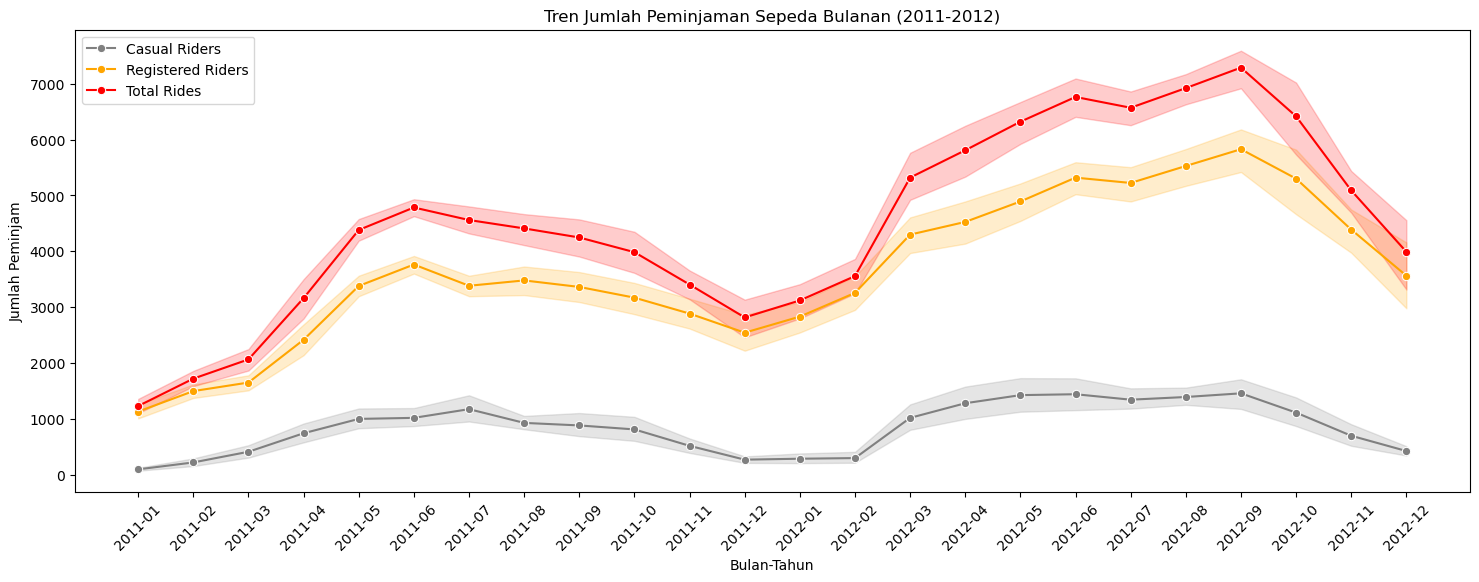

In [428]:
# Membuat figure dan plot
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_day, x="yearmonth", y="casual", label="Casual Riders", color="gray", marker="o")
sns.lineplot(data=df_day, x="yearmonth", y="registered", label="Registered Riders", color="orange", marker="o")
sns.lineplot(data=df_day, x="yearmonth", y="count_rent", label="Total Rides", color="red", marker="o")

# Konfigurasi tampilan
plt.title("Tren Jumlah Peminjaman Sepeda Bulanan (2011-2012)")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Peminjam")
plt.legend()
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan hasil pengamatan grafik diatas, dapat dilihat bahwa jumlah peminjaman sepeda pada tahun 2012 meningkat lebih tinggi dibandingkan tahun 2011. Hal ini menunjukkan jumlah pengguna layanan bike-sharing meningkat dari tahun ke tahun.
- Terdapat pola musiman dalam tren peminjaman sepeda selama dua tahun tersebut. Telihat pola pada awal tahun (Januari - Maret) peminjaman masih rendah, pada kuartal kedua (April-Juni) peminjaman mulai meningkat, pada kuartal keempat (Oktober-Desember) peminjaman mulai menurun lagi.

### Pertanyaan 2: Apakah Peningkatan Penggunaan Layanan Bike-Sharing Berasal dari Pengguna Registered atau Casual? (DONE)

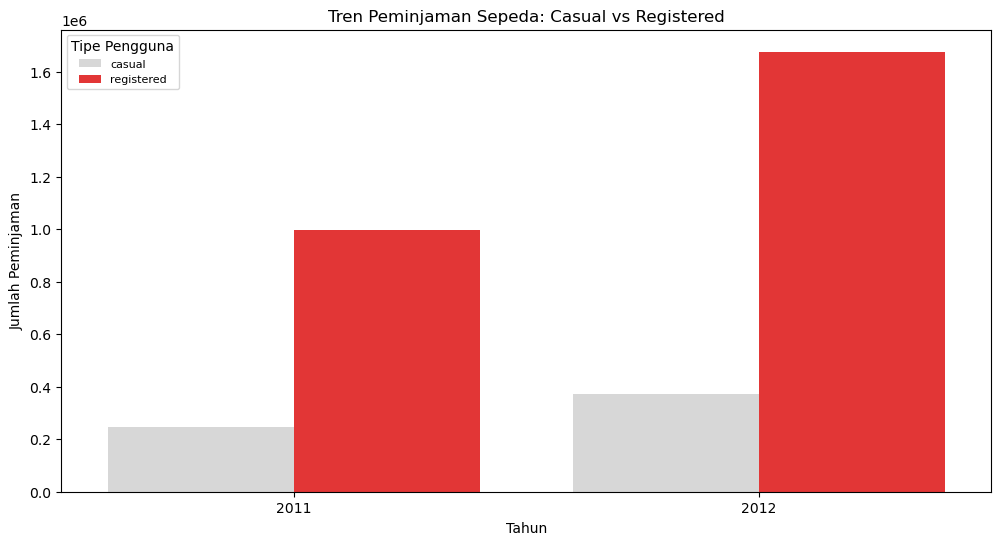

In [449]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="year", y="count", hue="user_type",
               palette={"casual": "#D3D3D3", "registered": "red"}, alpha=0.9)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda: Casual vs Registered")
plt.legend(title="Tipe Pengguna", fontsize=8)
plt.show()

**Insight:**
- Berdasarkan hasil pengamatan dari grafik diatas menunjukkan jumlah peminjaman sepeda oleh dua tipe pengguna yaitu Casual (warna abu-abu) dan Registered (warna merah).
- Pengguna Casual mengalami kenaikan peminjaman, tetapi peningkatannya relatif kecil dibandingkan pengguna registered. Pengguna Registered menunjukkan peningkatan yang sangat signifikan dari 2011 ke 2012, dengan jumlah peminjaman jauh lebih tinggi dibandingkan pengguna casual.
- Dapat disimpulkan bahwa peningkatan terbesar dalam penggunaan layanan bike-sharing berasal dari pengguna Registered. Hal ini menunjukkan bahwa lebih banyak orang mendaftar sebagai pengguna tetap dan lebih sering menggunakan layanan ini dibandingkan tahun sebelumnya. Meskipun pengguna Casual juga meningkat, kontribusinya terhadap total peningkatan tidak sebesar pengguna Registered.
- Jika tren ini berlanjut, strategi pemasaran bisa lebih difokuskan pada mendorong pengguna casual untuk beralih menjadi pengguna registered, misalnya dengan memberikan diskon langganan atau manfaat tambahan bagi pengguna yang mendaftar.

### Pertanyaan 3: Bagaimana Pola Penggunaan Layanan Bike-Sharing Berdasarkan Waktu Dalam Sehari? (DONE)

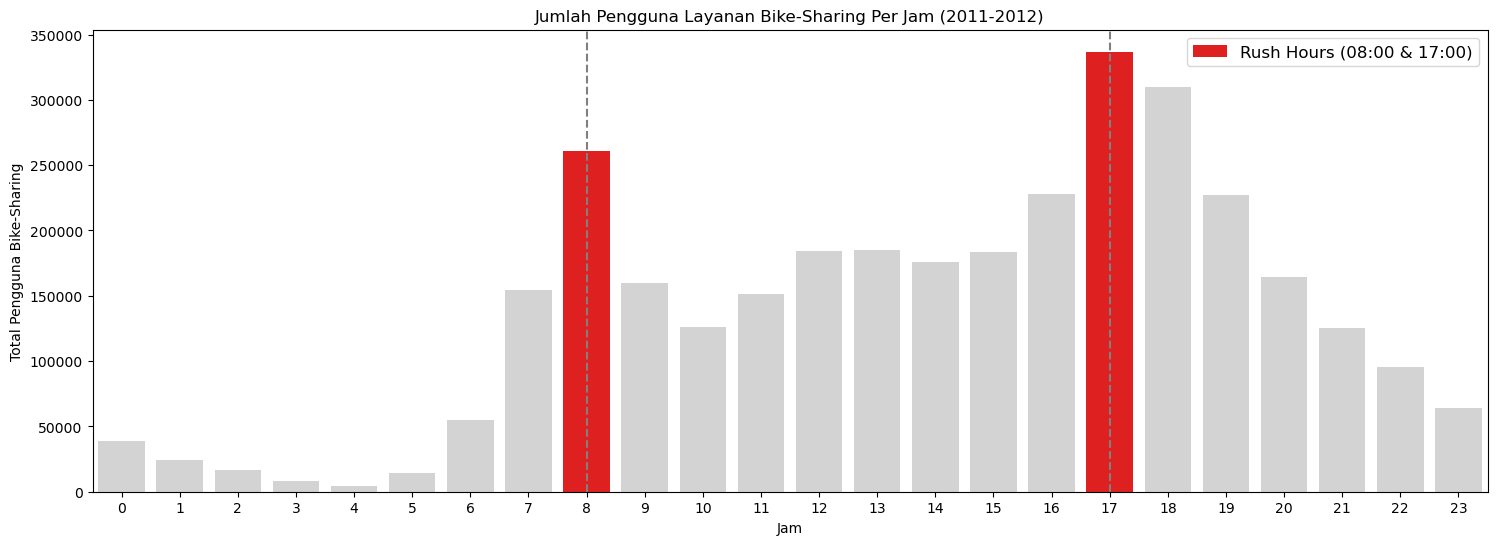

In [430]:
plt.figure(figsize=(18, 6))
sns.barplot(x="hour", y="count_rent", data=hourly_data, color='#D3D3D3')
sns.barplot(x="hour", y="count_rent", data=rush_data, color="red", label="Rush Hours (08:00 & 17:00)")

# Menambahkan garis vertikal untuk menandai jam sibuk
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

# Menambahkan label dan judul
plt.xlabel("Jam")
plt.ylabel("Total Pengguna Bike-Sharing")
plt.title("Jumlah Pengguna Layanan Bike-Sharing Per Jam (2011-2012)")

plt.xticks(np.arange(0, 24, 1))
plt.legend(loc='upper right', fontsize=12)
plt.show()

**Insight:** Berdasarkan hasil pengamatan pada grafik diatas, terlihat sangat jelas bahwa pola penggunaan layanan bike-sharing berdasarkan jam dalam sehari. Jumlah peminjaman sepeda mencapai puncaknya pada pukul 08.00 dan 17.00. Hal ini menunjukkan sebagian besar pengguna menggunakan sepeda untuk berangkat dan pulang kerja.

### Pertanyaan 4: Seberapa Berpengaruh Musim Terhadap Peningkatan Jumlah Penggunaan Layanan Bike-Sharing? (DONE)

C:\Users\User\AppData\Local\Temp\ipykernel_6504\339246763.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_6504\339246763.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




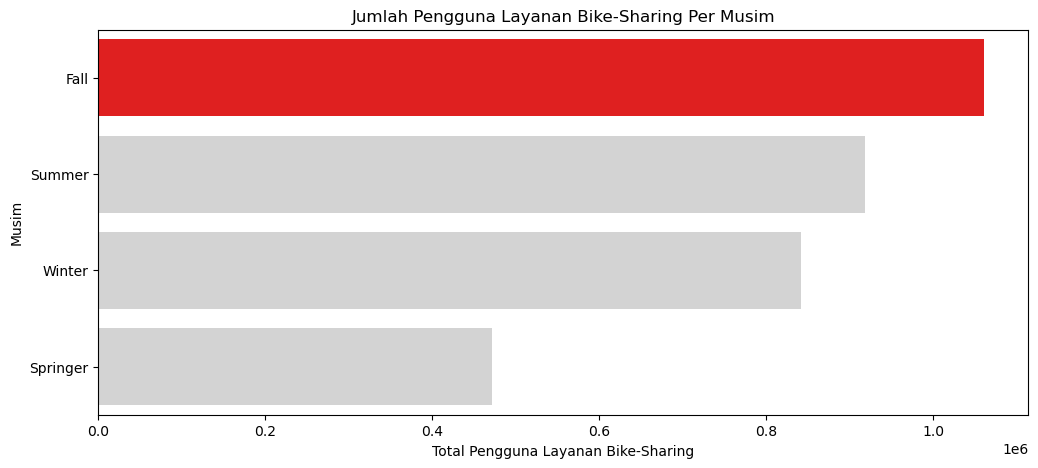

In [ ]:
# Membuat warna: merah untuk yang tertinggi, abu-abu untuk lainnya
colors = ["red" if season == max_season else "#D3D3D3" for season in seasonly_users_df_sorted["season"]]

# Membuat plot horizontal
plt.figure(figsize=(12, 5))
sns.barplot(x="count_rent", y="season", data=seasonly_users_df_sorted, palette=colors, order=seasonly_users_df_sorted["season"], orient="h")

# Menambahkan label dan judul
plt.xlabel("Total Pengguna Layanan Bike-Sharing")
plt.ylabel("Musim")
plt.title("Jumlah Pengguna Layanan Bike-Sharing Per Musim")

# Menampilkan plot
plt.show()


**Insight:**
Berdasarkan hasil pengamatan dari grafik diatas, dapat kita lihat jumlah peminjaman sepeda paling tinggi terjadi saat musim gugur (Fall). Hal ini menunjukkan bahwa penggunaan sepeda cenderung mencapai puncaknya di musim gugur, kemungkinan karena kondisi cuaca yang mendukung.

## 6. Menerapkan Analisis Lanjutan

### 1. Analisis RFM (DONE)

Analisis RFM ini bertujuan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian pelanggan dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [434]:
current_date = max(df_hour['date'])
rfm_df = df_hour.groupby('registered').agg({
    'date': lambda x: (current_date - x.max()).days,    # Recency
    'instant': 'count',                                 # Frequency
    'count_rent': 'sum'                                 # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### 2. Analisis Clustering

Analisis Clustering ini bertujuan untuk mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu.

## Conclusion

- `Pertanyaan 1:` Bagaimana Tren Jumlah Penggunaan Layanan Bike-Sharing dalam Beberapa Tahun Terakhir?
- `Pertanyaan 2:` Apakah Peningkatan Penggunaan Layanan Bike-Sharing Berasal dari Pengguna Registered atau Casual?
- `Pertanyaan 3:` Bagaimana Pola Penggunaan Layanan Bike-Sharing Berdasarkan Waktu Dalam Sehari?
- `Pertanyaan 4:` Seberapa Berpengaruh Musim Terhadap Peningkatan Jumlah Penggunaan Layanan Bike-Sharing?

- `Conclution pertanyaan 1:` 
- `Conclution pertanyaan 2:` 
- `Conclution pertanyaan 3:` 
- `Conclution pertanyaan 4:` 